In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [145]:
historical_index=pd.read_csv('historical_index.csv')
gender_inequality=pd.read_csv('gender_inequality.csv')
genderin=gender_inequality
genderin = genderin.replace(to_replace = '..', value = '0.1')
gender_inequality = gender_inequality[gender_inequality['Gender Inequality Index (GII)'] != ".."]
gender_development=pd.read_csv('gender_development.csv')
gender_development = gender_development[gender_development['Gender Development Index (GDI)'] != ".."]
human_development=pd.read_csv('human_development.csv')
historical_index.columns=["HDI Rank", "Country", "1990", "2000", "2010", "2011", "2012", "2013", "2014"]
tenyr=historical_index.drop(['2011', '2012','2013','2014'], axis=1)
tenyr= tenyr[tenyr['1990'] != ".."]
oneyr=historical_index.drop(['1990','2000'],axis=1)

In [121]:
#import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.offline as py
import plotly.graph_objects as go
#conda install plotly

data = [dict(
        type='choropleth',
        locations= genderin.Country,
        locationmode='country names',
        z=genderin['Gender Inequality Index (GII)'],
        text=gender_inequality.Country,
        colorscale = 'Blues',
        reversescale=True,
        colorbar=dict(autotick=False, tickprefix='', title='GII'),
)]
layout = dict(
            title = 'Gender Inequality',
            geo = dict(
            showframe = False, 
            showcoastlines = True, 
            projection = dict(type = 'Mercator')),
            margin = dict(t=30, b=30, l=10, r=10))
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)



/Users/asadrizvi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



[]

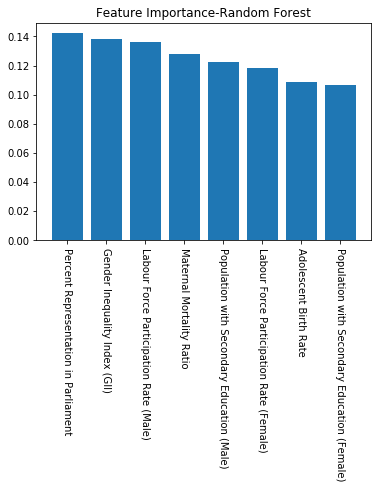

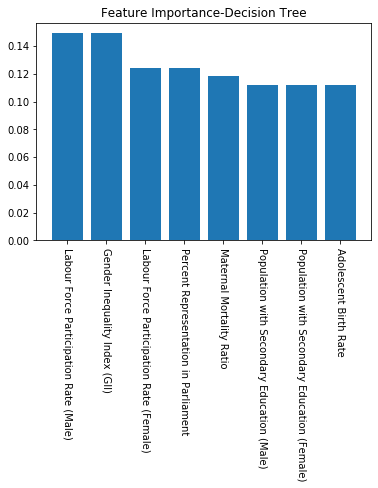

In [118]:
#Random Forest Classifier
X=gender_inequality.drop(['GII Rank','Country'], axis=1)
y=countries=gender_inequality['Country']
clf = RandomForestClassifier(random_state=0, n_jobs=-1)
model = clf.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance-Random Forest")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=270)
plt.plot()

#Decision Tree Classifier
clf=DecisionTreeClassifier(criterion='gini',random_state=None,presort=False)
model = clf.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance-Decision Tree")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=270)
plt.plot()

                                          Specs         Score
1                      Maternal Mortality Ratio  47005.107200
2                         Adolescent Birth Rate   5610.253675
4  Population with Secondary Education (Female)   2724.962961
5    Population with Secondary Education (Male)   2040.357489
3          Percent Representation in Parliament    978.727624
6      Labour Force Participation Rate (Female)    790.478994
7        Labour Force Participation Rate (Male)    150.838829
0                 Gender Inequality Index (GII)     15.590354
[0.11863354 0.11118012 0.12732919 0.11552795 0.13043478 0.12236025
 0.13602484 0.13850932]


/Users/asadrizvi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



[]

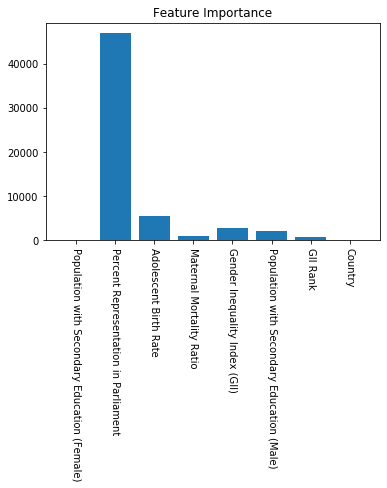

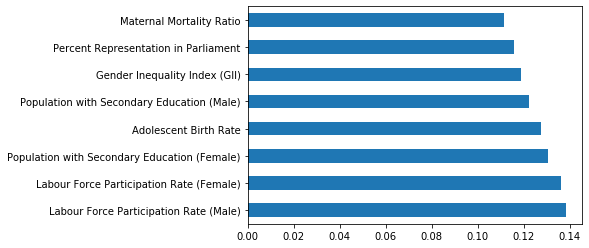

In [110]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))
plt.figure()
#plt.subplot(1,2,1)
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), featureScores['Score'])
plt.xticks(range(X.shape[1]), names, rotation=270)
plt.plot()


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
#plt.subplot(1,2,2)
plt.figure()
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.plot(rotation=180)

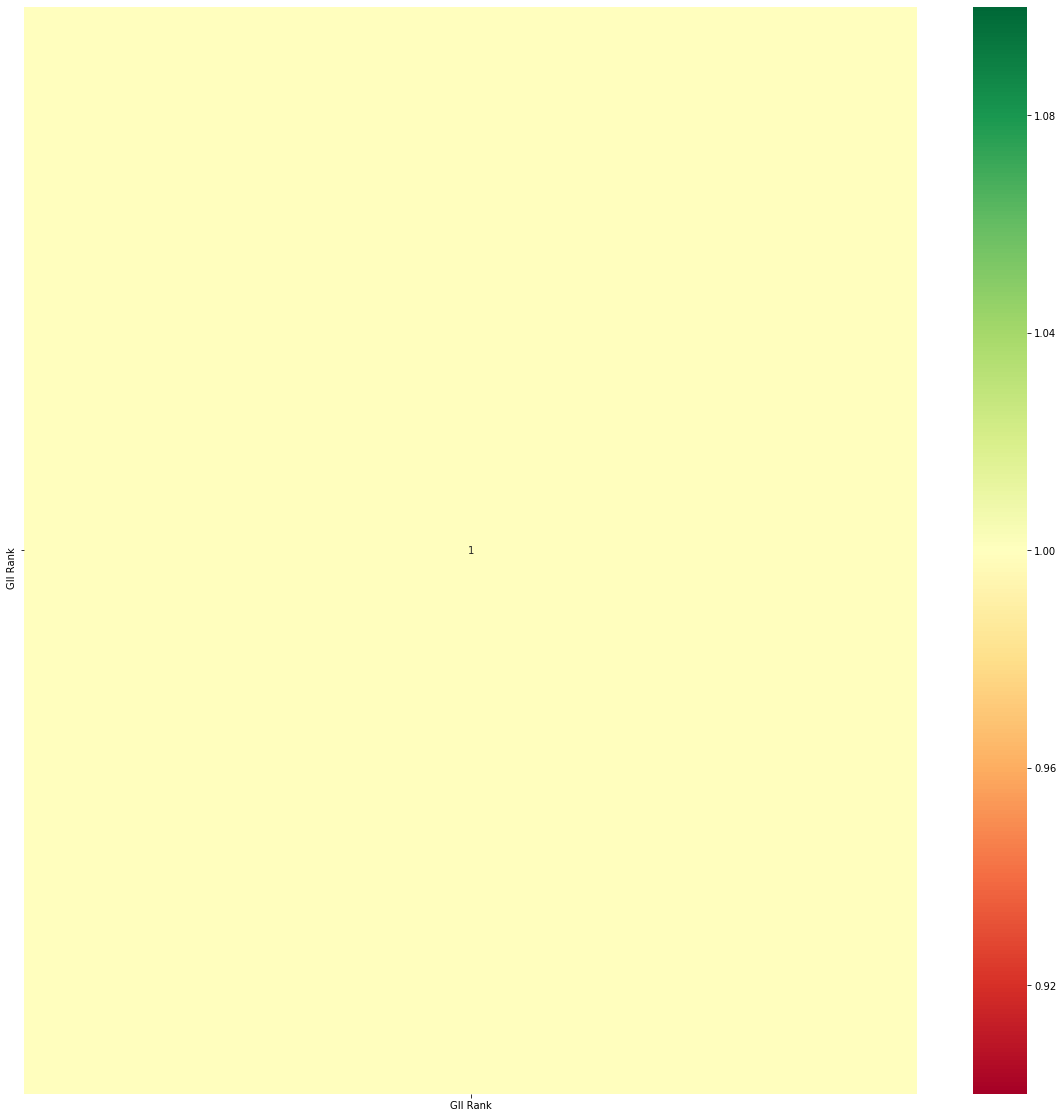

In [116]:
#get correlations of each features in dataset
corrmat = genderin.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(genderin.corr(),annot=True,cmap="RdYlGn")

In [144]:
df=pd.read_csv('2018_Human_Dev.csv')
#df=df.drop(['Unnamed: 5'],axis=1)
#df=df.drop(['Unnamed: 3'],axis=1)
#df=df.drop(['Unnamed: 7'],axis=1)
df=df.drop([3,5,7,])
df=df.drop([0,1,4,5],axis=0)
df.columns=["HDI Rank", "Country", "GII", "Rank", "Maternal Mortality Ratio", "Adolescent Birth Rate",
            "Share of Seats In Parliment", "Population With Secondary Education", "Male Labor Force Participation",
           "Female Labor Force Participation"]
df.dropna(axis=0, how='all')
df.dropna(axis=1, how='all')
df.head(30)

,Unnamed: 0,Table 5. Gender Inequality Index,Unnamed: 2,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
2,NaN,NaN,Gender Inequality Index,NaN,Maternal mortality ratio,Adolescent birth rate,NaN,Share of seats in parliament,NaN,Population with at least some secondary education,NaN,NaN,NaN,Labour force participation rate,NaN,NaN,a
3,NaN,NaN,Value,Rank,"(deaths per 100,000 live births)","(births per 1,000 women ages 15–19)",NaN,(% held by women),NaN,(% ages 25 and older),NaN,NaN,NaN,(% ages 15 and older),NaN,NaN,NaN
6,NaN,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,Norway,0.048,5,5,5.6,NaN,41.4,NaN,96.3,NaN,95.1,NaN,60.8,NaN,67.6,NaN
8,2,Switzerland,0.039,1,5,3.0,NaN,29.3,NaN,96.4,NaN,97.2,NaN,62.9,NaN,74.1,NaN
9,3,Australia,0.109,23,6,12.9,NaN,32.7,NaN,90.0,NaN,89.9,NaN,59.2,NaN,70.5,NaN
10,4,Ireland,0.109,23,8,9.7,NaN,24.3,NaN,90.2,NaN,86.3,NaN,53.0,NaN,67.3,NaN
11,5,Germany,0.072,14,6,6.5,NaN,31.5,NaN,96.2,NaN,96.8,NaN,55.0,NaN,66.2,NaN
12,6,Iceland,0.062,9,3,6.8,NaN,38.1,NaN,100.0,NaN,100.0,NaN,72.8,NaN,81.8,NaN
13,7,"Hong Kong, China (SAR)",..,..,..,2.7,NaN,..,NaN,75.7,NaN,81.8,NaN,54.0,NaN,68.1,NaN
